**Importing The Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


**Importing The data And Reading it**

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(how = 'any', inplace = True, axis = 1)
df.columns = ["label", "message"]

In [ ]:
feat = df['message']
label = df['label']

In [ ]:
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,Rofl. Its true to its name
freq,4516,1


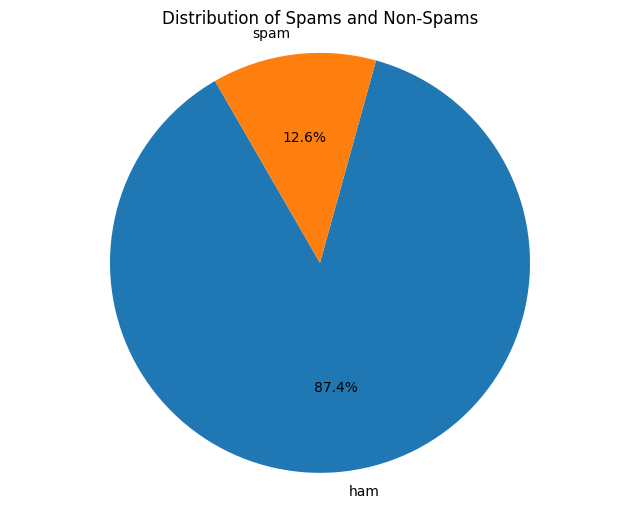

In [ ]:
df['label'].value_counts

# Plotting
df['label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(df['label'].value_counts(), labels= df['label'].unique(), autopct='%1.1f%%', startangle=120)
plt.title('Distribution of Spams and Non-Spams')
plt.axis('equal')
plt.show()
plt.show()


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()

def preprocess_massage(massage):
    massage = massage.lower()
    massage = re.sub('[^a-zA-Z]', ' ', massage)
    massage = massage.split()
    massage = [ps.stem(word) for word in massage if not word in set(stopwords.words('english'))]
    massage = ' '.join(massage)
    return massage

# Create the 'massage' column and apply the function
feat = pd.DataFrame(feat) # Convert feat to DataFrame to add a new column
feat['massage'] = feat['message'].apply(preprocess_massage)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5572)
X = vectorizer.fit_transform(feat['massage']).toarray()
y = df['label'].map({'ham':0,'spam': 1})

In [ ]:
y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.value_counts())

label
0    3627
1     508
Name: count, dtype: int64


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)


In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9690522243713733


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(units=512, activation= 'relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1 , activation= 'sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

**Evaluating The Model**

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.8485 - loss: 0.4490 - val_accuracy: 0.8598 - val_loss: 0.1770
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8854 - loss: 0.1483 - val_accuracy: 0.9700 - val_loss: 0.1255
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9888 - loss: 0.0661 - val_accuracy: 0.9787 - val_loss: 0.0709
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0173 - val_accuracy: 0.9787 - val_loss: 0.0691
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9972 - loss: 0.0119 - val_accuracy: 0.9787 - val_loss: 0.0721
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9997 - loss: 0.0041 - val_accuracy: 0.9807 - val_loss: 0.0817
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9997 - loss: 0.0025 - val_accuracy: 0.9807 - val_loss: 0.0835
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.9797 - val_loss

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9828 - loss: 0.0903
Test Loss: 0.09425099939107895, Test Accuracy: 0.9816247820854187


**Ploting The Graph**

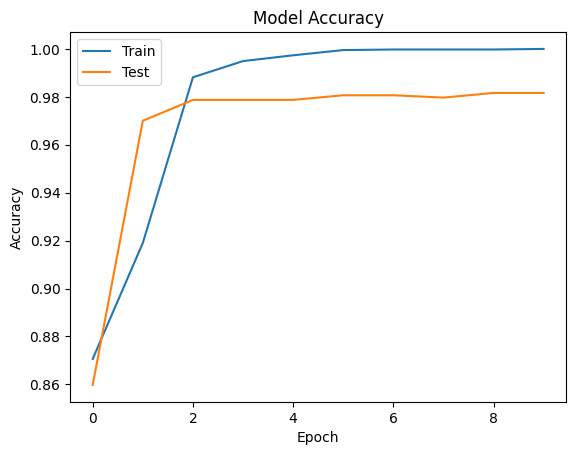

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()